In [4]:
import numpy as np
#import urllib2
import pandas as pd
#from StringIO import StringIO

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"

#data = urllib2.urlopen(target_url)  #.read()
df = pd.read_csv(target_url, header=None, prefix='V')  #StringIO(data)

print ("数据集规模：",df.shape)

print ("\n数据集数据类型：\n",df.get_dtype_counts())

数据集规模： (208, 61)

数据集数据类型：
 float64    60
object      1
dtype: int64


In [11]:
df.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


/home/x/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


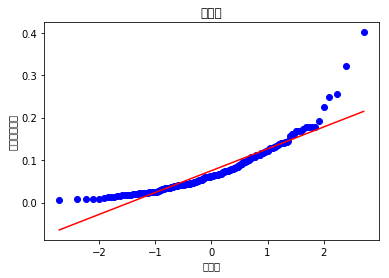

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
stats.probplot(df['V4'].values,dist="norm", plot=plt)#根据官方文档，iloc是按行切片
plt.xlabel("分位数")
plt.ylabel("已经排序数值")
plt.title("概率图")
plt.show()

这表明：此数据集尾部的数据要多于高斯分布尾部的数据。

### 利用平行坐标图进行可视化

对于具有多个属性问题的一种可视化方法叫**平行坐标图**，即绘制每行数据由属性值构成的行向量。

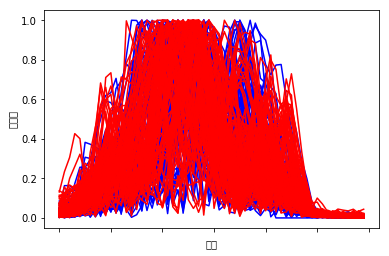

In [17]:
for i in range(df.shape[0]):
    if df.iloc[i,60] == 'M':
        pcolor = "red"
    else:
        pcolor = 'blue'
    df.iloc[i,0:60].plot(color=pcolor)
plt.xlabel("属性")
plt.ylabel("属性值")
plt.show()

虽然对应的图看不出明显的差别，但 1）沿图的底部，蓝色的线要突出一点；2）在30-40之间蓝色的线多少要比红色的线要高点。而这些观察有助于解释和确认某些预测的结果。

### 属性和标签的关系可视化

#### 1）首先绘制属性之间的散点图（以2-3， 2-21属性对为例）

下面绘制的两张散点图直观显示，频率离的近的信号相关性要更高，后面的相关系数计算更加说明了这一点。

**注意**：原书的代码一定是错误的（即下面代码中被屏蔽的代码是错误的），自然原书画出的图也是错误的。

/home/x/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


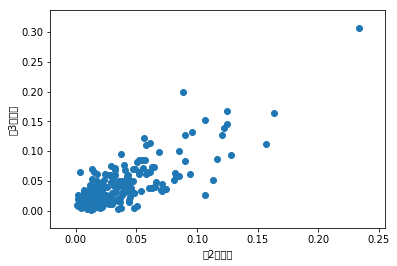

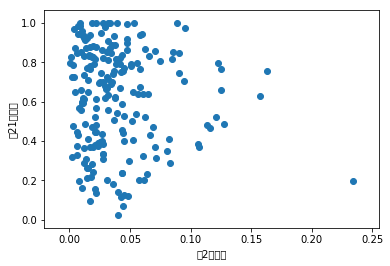

In [26]:
plt.scatter(df.iloc[:,1], df.iloc[:,2])
plt.xlabel("第2个属性")
plt.ylabel("第3个属性")
plt.show()

plt.scatter(df.iloc[:,1], df.iloc[:,21])
plt.xlabel("第2个属性")
plt.ylabel("第21个属性")
plt.show()

In [32]:
print ("第2属性和第3属性的相关系数：",df.iloc[:,1].corr(df.iloc[:,2]))
print ("第2属性和第21属性的相关系数：",df.iloc[:,1].corr(df.iloc[:,21]))

第2属性和第3属性的相关系数： 0.7799158719104267
第2属性和第21属性的相关系数： -0.07415721762868378


#### 2） 绘制区分度最大的属性（猜测）和标签的散点图

根据前面的平行坐标图，在30-40之间蓝色的线多少要比红色的线要高点，并且大概在35索引值附近有所分离。

于是我们猜测第35个属性区分度最大，并绘制这个属性和标签的散点图。

下面第一张图的散点挤在一起看不清楚，于是故意将标签值上下随机做点扰动，并且进行半透明处理，于是有了第二张图。

/home/x/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


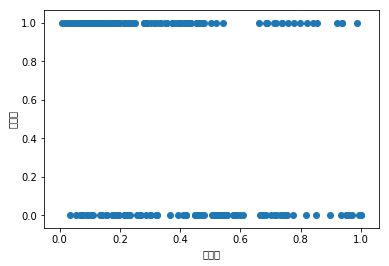

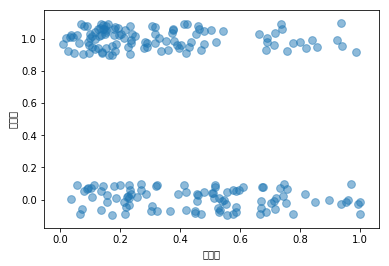

In [33]:
plt.scatter(df.iloc[:,35], df.iloc[:,60].apply(lambda v: 1.0 if v== 'M' else 0.0))
plt.xlabel("属性值")
plt.ylabel("标签值")
plt.show()

from random import uniform
plt.scatter(df.iloc[:,35], df.iloc[:,60].apply(lambda v: (1.0 if v== 'M' else 0.0)+uniform(-0.1,0.1)), alpha=0.5, s=60)
plt.xlabel("属性值")
plt.ylabel("标签值")
plt.show()

观察第二张图， 左上方的点更密集一点（水雷）。经过简单的观察，我们可以建立一个粗略的分类器（至少效果比随机猜测要好点）： 判断第36个属性是否大于0.5，如果大于则判断为岩石，否则判断为水雷。 

### 用热度图展示属性和标签的相关性

/home/x/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


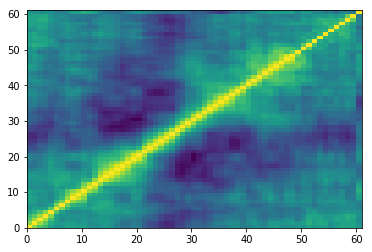

In [34]:
_df = df.copy()
_df['V60'] = _df['V60'].apply(lambda v: 1.0 if v== 'M' else 0.0)
plt.pcolor(_df.corr())
plt.xlim((0,61))
plt.ylim((0,61))
plt.show()